### Init

In [2]:
import pandas as pd
import spectral
import numpy as np
from data_handling import (
    get_hsi_capture,
    limit_reflection,
    display_roi_rectangle,
    get_2d_roi,
    get_mean_plot,
    snv_transform,
    smooth_and_transform,
    load_hsi_data
)
import plotly.io as pio
import plotly.express as px
from sklearn import preprocessing

pd.options.plotting.backend = "plotly"
root = r"D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures"
RGB_BANDS = (60, 80, 170)
BANDS = np.round(np.linspace(900,1700,224),1);
BAND_LOW = 8
BAND_HIGH = 210
PLOT_LABELS = {"index": "Wavelength [nm]", "value": "reflectance [1]", "variable": "pixel"}
COLUMN_NAMES = BANDS[BAND_LOW:BAND_HIGH]

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

spectral.settings.envi_support_nonlowercase_params = True

pio.renderers.default = "browser"

#### Read and Display Data

In [1]:
import spectral
spectral.settings.envi_support_nonlowercase_params=True

%matplotlib qt5

In [2]:
from data_handling import get_hsi_capture, load_hsi_data

capture_name = "Referenzmaterialien_(oben_nach_unten)"

capture = get_hsi_capture(capture_name, root+"\old")
data = load_hsi_data(capture)

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\old\qd_Referenzmaterialien_(oben_nach_unten)_PE_-_PET_-_PP_-_PS_2020-07-10_12-39-11\capture\REFLECTANCE_qd_Referenzmaterialien_(oben_nach_unten)_PE_-_PET_-_PP_-_PS_2020-07-10_12-39-11.dat'
	# Rows:            869
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


In [10]:
from data_handling import limit_reflection

RGB_BANDS = (60, 80, 170)
img = spectral.imshow(
    limit_reflection(data), RGB_BANDS, title="Referenzkunststoffe False-RGB"
)

In [ ]:
from data_handling import get_2d_roi, display_roi_rectangle



#### Polyethylen-Typen

In [69]:
capture_hdpe = get_hsi_capture("HDPE", root+"\PE")
capture_ldpe = get_hsi_capture("_LDPE", root+"\PE")
capture_lldpe = get_hsi_capture("LLDPE", root+"\PE")


d:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\python_clean\.venv\lib\site-packages\spectral\io\envi.py:175: UserWarning:

Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\PE\p6bb-rs_HDPE_referenz_2021-11-16_14-41-25\capture\REFLECTANCE_p6bb-rs_HDPE_referenz_2021-11-16_14-41-25.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\PE\p6bb-rs_LDPE_referenz_2021-11-16_14-53-53\capture\REFLECTANCE_p6bb-rs_LDPE_referenz_2021-11-16_14-53-53.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  1

In [51]:
data_hdpe = load_hsi_data(capture_hdpe)
data_ldpe = load_hsi_data(capture_ldpe)
data_lldpe = load_hsi_data(capture_lldpe)

In [52]:
%matplotlib qt5
im_hdpe = spectral.imshow(limit_reflection(data_hdpe), RGB_BANDS, title="HDPE")
im_ldpe = spectral.imshow(limit_reflection(data_ldpe), RGB_BANDS, title="LDPE")
im_lldpe = spectral.imshow(limit_reflection(data_lldpe), RGB_BANDS, title="LLDPE")

In [53]:
roi_hdpe = {"y_low": 350, "y_high": 500, "x_low": 250,  "x_high": 400}
roi_ldpe = {"y_low": 250, "y_high": 400, "x_low": 250,  "x_high": 400}
roi_lldpe = {"y_low": 350, "y_high": 500, "x_low": 250,  "x_high": 400}

In [77]:
roi_data_hdpe = get_2d_roi(data_hdpe, **roi_ps,band_low=BAND_LOW, band_high=BAND_HIGH)
roi_data_ldpe = get_2d_roi(data_ldpe, **roi_ldpe,band_low=BAND_LOW, band_high=BAND_HIGH)
roi_data_lldpe = get_2d_roi(data_lldpe, **roi_lldpe,band_low=BAND_LOW, band_high=BAND_HIGH)

In [103]:
# Display ROI on top of the image
roi_img_hdpe = display_roi_rectangle(data_hdpe, **roi_ps, title="Selected ROI ps", rgb_band_indexes=RGB_BANDS)
roi_img_ldpe = display_roi_rectangle(data_ldpe, **roi_ldpe, title="Selected ROI LDPE", rgb_band_indexes=RGB_BANDS)
roi_img_lldpe = display_roi_rectangle(data_lldpe, **roi_lldpe, title="Selected ROI LLDPE", rgb_band_indexes=RGB_BANDS)

In [78]:
snv_data_dict = {}
df = pd.DataFrame(roi_data_hdpe, columns = COLUMN_NAMES)
np_snv = snv_transform(df)
df_snv = pd.DataFrame(np_snv, columns=COLUMN_NAMES)
snv_data_dict["HDPE"] = df_snv

df = pd.DataFrame(roi_data_ldpe, columns = COLUMN_NAMES)
np_snv = snv_transform(df)
df_snv = pd.DataFrame(np_snv, columns=COLUMN_NAMES)
snv_data_dict["LDPE"] = df_snv

df = pd.DataFrame(roi_data_lldpe, columns = COLUMN_NAMES)
np_snv = snv_transform(df)
df_snv = pd.DataFrame(np_snv, columns=COLUMN_NAMES)
snv_data_dict["LLDPE"] = df_snv

In [79]:
mean_data_dict = {}
mean_data_dict["HDPE"] = np.mean(snv_data_dict["HDPE"], axis=0)
mean_data_dict["LDPE"] = np.mean(snv_data_dict["LDPE"], axis=0)
mean_data_dict["LLDPE"] = np.mean(snv_data_dict["LLDPE"], axis=0)

In [81]:
df_mean = pd.DataFrame.from_dict(mean_data_dict, orient="index", columns=COLUMN_NAMES)
df_mean.head()

,928.7,932.3,935.9,939.5,943.0,946.6,950.2,953.8,957.4,961.0,...,1617.5,1621.1,1624.7,1628.3,1631.8,1635.4,1639.0,1642.6,1646.2,1649.8
HDPE,1.468555,1.496719,1.518647,1.539847,1.557221,1.568505,1.572750,1.569956,1.558760,1.536356,...,-0.044579,-0.081518,-0.125289,-0.182970,-0.254440,-0.340532,-0.441273,-0.555574,-0.677788,-0.808995
LDPE,1.424654,1.448622,1.466756,1.483729,1.496414,1.503424,1.503667,1.497373,1.484885,1.463493,...,-0.046922,-0.091008,-0.138698,-0.195841,-0.264290,-0.344362,-0.437840,-0.544581,-0.658986,-0.785965
LLDPE,1.408355,1.434591,1.454410,1.472648,1.486923,1.495190,1.497288,1.493427,1.482275,1.461315,...,-0.183829,-0.202441,-0.231287,-0.279583,-0.343873,-0.420936,-0.511846,-0.616792,-0.729287,-0.854046


In [104]:
pio.renderers.default = "browser"
long_df_mean = pd.melt(df_mean, var_name="wavelength [nm]", ignore_index=False, value_name="reflectance [1]")
px.line(long_df_mean, x="wavelength [nm]", y="reflectance [1]", color=long_df_mean.index, title="Unterschiedliche PE-Typen")

In [99]:
# Würde alternativ die Spektren zwischen 0-1 skaliert darstellen
# from sklearn import preprocessing
# mean_scaled = preprocessing.minmax_scale(df_mean.T).T
# df_mean_scaled = pd.DataFrame(mean_scaled, columns=COLUMN_NAMES)
# df_mean_scaled.set_index(pd.Index(["HDPE","LDPE","LLDPE"]), inplace=True)
# df_mean_scaled.head()
# long_df_mean = pd.melt(df_mean_scaled, var_name="wavelength [nm]", ignore_index=False, value_name="reflectance [1]")
# px.line(long_df_mean, x="wavelength [nm]", y="reflectance [1]", color=long_df_mean.index, title="Unterschiedliche PE-Typen")

#### Polycarbonat

In [ ]:
%matplotlib qt5
capture_pc = get_hsi_capture("PC", root+"\references")
capture_ps = get_hsi_capture("PS", root+"\references")
data_pc = load_hsi_data(capture_pc)
data_ps = load_hsi_data(capture_ps)
im_pc = spectral.imshow(limit_reflection(data_pc), RGB_BANDS, title="PC")
im_ps = spectral.imshow(limit_reflection(data_ps), RGB_BANDS, title="PS")

roi_pc = {"y_low": 380, "y_high": 480, "x_low": 300,  "x_high": 420}
roi_ps = {"y_low": 380, "y_high": 480, "x_low": 300,  "x_high": 420}

roi_data_pc = get_2d_roi(data_pc, **roi_pc,band_low=BAND_LOW, band_high=BAND_HIGH)
roi_data_ps = get_2d_roi(data_ps, **roi_ps,band_low=BAND_LOW, band_high=BAND_HIGH)

snv_data_dict = {}
df = pd.DataFrame(roi_data_pc, columns = COLUMN_NAMES)
np_snv = snv_transform(df)
df_snv_pc = pd.DataFrame(np_snv, columns=COLUMN_NAMES)
snv_data_dict["PC"] = df_snv_pc

df = pd.DataFrame(roi_data_ps, columns = COLUMN_NAMES)
np_snv = snv_transform(df)
df_snv_ps = pd.DataFrame(np_snv, columns=COLUMN_NAMES)
snv_data_dict["PS"] = df_snv_ps

mean_data_dict = {}
mean_data_dict["PC"] = np.mean(snv_data_dict["PC"], axis=0)
mean_data_dict["PS"] = np.mean(snv_data_dict["PS"], axis=0)

df_mean = pd.DataFrame.from_dict(mean_data_dict, orient="index", columns=COLUMN_NAMES)
df_mean.head()

pio.renderers.default = "browser"
long_df_mean = pd.melt(df_mean, var_name="wavelength [nm]", ignore_index=False, value_name="reflectance [1]")
px.line(long_df_mean, x="wavelength [nm]", y="reflectance [1]", color=long_df_mean.index, title="Polycarbonat vs Polystyrol")

d:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\python_clean\.venv\lib\site-packages\spectral\io\envi.py:175: UserWarning:

Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\references\p6bb-rs_PC_referenz_2021-11-16_15-11-36\capture\REFLECTANCE_p6bb-rs_PC_referenz_2021-11-16_15-11-36.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\references\p6bb-rs_PS_referenz_2021-11-16_14-32-57\capture\REFLECTANCE_p6bb-rs_PS_referenz_2021-11-16_14-32-57.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantiza

In [ ]:
df = pd.DataFrame()
df = pd.concat([df_snv_pc.sample(50), df_snv_ps.sample(50)], ignore_index=True)
df.head()
df.T.plot.line()
# df_snv = pd.DataFrame.from_dict(snv_data_dict, orient="index", columns=COLUMN_NAMES)

# long_df_snv = pd.melt(df_snv.sample(100), var_name="wavelength [nm]", ignore_index=False, value_name="reflectance [1]")
# px.line(long_df_snv, x="wavelength [nm]", y="reflectance [1]", color=long_df_snv.index, title="Polycarbonat vs Polystyrol")


d:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\python_clean\.venv\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



#### PVC

In [ ]:
%matplotlib qt5
capture_pvc = get_hsi_capture("PVC", root+"\references")
data_pvc = load_hsi_data(capture_pvc)
im_pvc = spectral.imshow(limit_reflection(data_pvc), RGB_BANDS, title="PVC")

d:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\python_clean\.venv\lib\site-packages\spectral\io\envi.py:175: UserWarning:

Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\references\p6bb-rs_PVC_recycling_referenz_2021-11-16_14-37-27\capture\REFLECTANCE_p6bb-rs_PVC_recycling_referenz_2021-11-16_14-37-27.dat'
	# Rows:            859
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


In [ ]:
roi_pvc = {"y_low": 220, "y_high": 280, "x_low": 270,  "x_high": 300}
roi_data_pvc = get_2d_roi(data_pvc, **roi_pvc)
roi_img_pvc = display_roi_rectangle(data_pvc, **roi_pvc, title="Selected ROI", rgb_band_indexes=RGB_BANDS)

In [ ]:
scaler = preprocessing.MinMaxScaler()

df = pd.DataFrame(roi_data_pvc, columns = COLUMN_NAMES)
np_snv = snv_transform(df)
np_mean = np.array(np_snv.mean(axis=0))
pd.DataFrame(np_mean).plot()
scaled = scaler.fit_transform(np_mean.reshape(-1,1))
pd.DataFrame(scaled).plot()
# df_scaled.T.plot.line(title="PVC Mean Reflectance", labels=PLOT_LABELS)

#### PLA

In [3]:
%matplotlib qt5
capture_pla = get_hsi_capture("PLA", root+"\references")
data_pla = load_hsi_data(capture_pla)
im_pla = spectral.imshow(limit_reflection(data_pla), RGB_BANDS, title="PLA")

d:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\python_clean\.venv\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\references\p6bb-rs_PLA_referenz_axpo_2021-11-16_15-08-41\capture\REFLECTANCE_p6bb-rs_PLA_referenz_axpo_2021-11-16_15-08-41.dat'
	# Rows:            859
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


In [4]:
roi_pla = {"y_low": 380, "y_high": 520, "x_low": 260,  "x_high": 400}
roi_data_pla = get_2d_roi(data_pla, **roi_pla)
roi_img_pla = display_roi_rectangle(data_pla, **roi_pla, title="Selected ROI of PLA", rgb_band_indexes=RGB_BANDS)

In [11]:
pio.renderers.default = "browser"
df = pd.DataFrame(roi_data_pla, columns = COLUMN_NAMES)
np_snv = snv_transform(roi_data_pla)
df_snv = pd.DataFrame(np_snv, columns = COLUMN_NAMES)
df_snv.mean(axis=0).plot.line(title="PLA Mean Reflectance", labels=PLOT_LABELS)

#### Fremdstoffe aus Kompostanlage

In [2]:
%matplotlib qt5

##### Maske (wahrscheinlich PP)

In [3]:
capture_name = "MundNasenSchutz"
capture = get_hsi_capture(capture_name, root)
data = load_hsi_data(capture)

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\p6bb-rs_mundnasenschutz_2022-03-09_07-39-37\capture\REFLECTANCE_p6bb-rs_mundnasenschutz_2022-03-09_07-39-37.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


In [18]:
roi = {"y_low": 150, "y_high": 300, "x_low": 250,  "x_high": 400}
roi_data = get_2d_roi(data, **roi)
display_roi_rectangle(data, **roi, title=f"ROI of {capture_name}")
df = pd.DataFrame(roi_data, columns=COLUMN_NAMES)
df.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"{capture_name} - 500 sample pixels")

In [9]:
roi_schmutzig = {"y_low": 500, "y_high": 650, "x_low": 350,  "x_high": 500}
roi_data_schmutzig = get_2d_roi(data, **roi_schmutzig)
display_roi_rectangle(data, **roi_schmutzig, title=f"ROI of {capture_name}")
df_schmutzig = pd.DataFrame(roi_data_schmutzig, columns=COLUMN_NAMES)
df_schmutzig.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"{capture_name} - schmutzig - 500 sample pixels")

In [30]:
mean_df = pd.concat(
    [df.mean(axis=0), df_schmutzig.mean(axis=0)], ignore_index=True, axis=1
)
mean_df = mean_df.T.set_index(pd.Index(["MNS", "MNS - schmutzig"]))
mean_df.T.plot.line(
    labels={
        "index": "Wavelength [nm]",
        "value": "reflectance [1]",
        "variable": "Material",
    },
    title="Durchschnitts-Spektrum ROI 1 und ROI 2 von MNS",
)

##### Blumentöpfe

In [5]:
capture_name = "Blumentoepfe"
capture = get_hsi_capture(capture_name, root)
data = load_hsi_data(capture)

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\p6bb-rs_blumentoepfe_2022-03-09_07-55-05\capture\REFLECTANCE_p6bb-rs_blumentoepfe_2022-03-09_07-55-05.dat'
	# Rows:            859
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


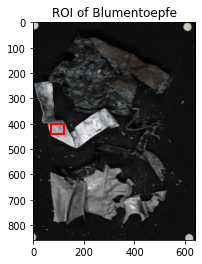

In [12]:
roi = {"y_low": 400, "y_high": 440, "x_low": 70,  "x_high": 120}
roi_data = get_2d_roi(data, **roi)
display_roi_rectangle(data, **roi, title=f"ROI of {capture_name}")
df = pd.DataFrame(roi_data, columns=COLUMN_NAMES)
df.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"{capture_name} - 500 sample pixels")

In [106]:
df_references = pd.read_csv("processed_data\mean_reference_plastics.csv", sep="\t", index_col=[0])
df_pp = df_references.loc[["PP"]]
df_pp.columns = df_pp.columns.astype("float64")

np_mean = np.reshape(np.mean(roi_data, axis=0), (1,-1))
df_mean = pd.DataFrame(np_mean, columns=COLUMN_NAMES)

combined_df = pd.concat([df_pp, df_mean])
combined_df = preprocessing.minmax_scale(combined_df.T).T
scaled_df = pd.DataFrame(combined_df, columns=COLUMN_NAMES)
scaled_df.set_index(pd.Index(["PP", "Blumentopf"]), inplace=True)

In [121]:
scaled_df.T.plot.line(
    labels={
        "index": "Wavelength [nm]",
        "value": "reflectance [1]",
        "variable": "Material",
    },
    title="Mean von PP und Blumentopf",
)

In [24]:
roi = {"y_low": 650, "y_high": 750, "x_low": 220,  "x_high": 280}
roi_data = get_2d_roi(data, **roi)
display_roi_rectangle(data, **roi, title=f"ROI of {capture_name}")
df = pd.DataFrame(roi_data, columns=COLUMN_NAMES)
df.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"{capture_name} 2 - 500 sample pixels")

In [25]:
mean_plot = get_mean_plot(roi_data, column_names=COLUMN_NAMES, labels=PLOT_LABELS, title="Blumentoepfe 2 - Mean")
mean_plot.show()

##### Plastiksäcke 1

In [31]:
capture_name = "kunststoffsaecke_"
capture = get_hsi_capture(capture_name, root)
data = load_hsi_data(capture)

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\p6bb-rs_kunststoffsaecke_2022-03-09_07-43-52\capture\REFLECTANCE_p6bb-rs_kunststoffsaecke_2022-03-09_07-43-52.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


In [33]:
roi = {"y_low": 540, "y_high": 580, "x_low": 400,  "x_high": 480}
roi_data = get_2d_roi(data, **roi)
display_roi_rectangle(data, **roi, title=f"ROI of {capture_name}")
df = pd.DataFrame(roi_data, columns=COLUMN_NAMES)
df.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"{capture_name} - 500 sample pixels")

In [34]:
mean_plot = get_mean_plot(roi_data, column_names=COLUMN_NAMES, labels=PLOT_LABELS, title="Kunststoffsäcke - Mean")
mean_plot.show()

In [36]:
df_references = pd.read_csv("processed_data\mean_reference_plastics.csv", sep="\t", index_col=[0])
df_pe = df_references.loc[["LDPE"]]
df_pe.columns = df_pe.columns.astype("float64")

np_mean = np.reshape(np.mean(roi_data, axis=0), (1,-1))
df_mean = pd.DataFrame(np_mean, columns=COLUMN_NAMES)

combined_df = pd.concat([df_pe, df_mean])
combined_df = preprocessing.minmax_scale(combined_df.T).T
scaled_df = pd.DataFrame(combined_df, columns=COLUMN_NAMES)
scaled_df.set_index(pd.Index(["LDPE", "Plastiksaecke"]), inplace=True)

In [38]:
scaled_df.T.plot.line(
    labels={
        "index": "Wavelength [nm]",
        "value": "reflectance [1]",
        "variable": "Material",
    },
    title="Mean von PE und Plastiksack",
)

In [46]:
from scipy.signal import savgol_filter
smooth_deriv = savgol_filter(scaled_df, window_length=15, polyorder=2, deriv=1)
snv = snv_transform(smooth_deriv)
df_new = pd.DataFrame(snv,columns=COLUMN_NAMES)
df_new.T.plot.line()

##### Plastiksäcke 2 - Auf Kompost

In [14]:
%matplotlib qt5
capture_name = "sp10_mit_kunststoffen_3"
capture = get_hsi_capture(capture_name, root+"\training")
data = load_hsi_data(capture)

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\training\qd_kompost_sp10_mit_kunststoffen_3_2022-06-08_06-42-32\capture\REFLECTANCE_qd_kompost_sp10_mit_kunststoffen_3_2022-06-08_06-42-32.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


In [18]:
roi = {"y_low": 600, "y_high": 660, "x_low": 120,  "x_high": 240}
roi_data = get_2d_roi(data, **roi)
display_roi_rectangle(data, **roi, title=f"ROI of {capture_name}")
df = pd.DataFrame(roi_data, columns=COLUMN_NAMES)
df.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"Sack auf Kompost - 500 sample pixels")

In [19]:
roi_kompost = {"y_low": 670, "y_high": 730, "x_low": 350,  "x_high": 410}
roi_data_kompost = get_2d_roi(data, **roi_kompost)
display_roi_rectangle(data, **roi_kompost, title=f"ROI of {capture_name}")
df_kompost = pd.DataFrame(roi_data_kompost, columns=COLUMN_NAMES)
df_kompost.sample(500).T.plot.line(labels=PLOT_LABELS, title=f"Kompost - 500 sample pixels")

In [20]:
mean_df = pd.concat(
    [df.mean(axis=0), df_kompost.mean(axis=0)], ignore_index=True, axis=1
)
mean_df = mean_df.T.set_index(pd.Index(["Sack auf Kompost", "Kompost"]))
mean_df.T.plot.line(
    labels={
        "index": "Wavelength [nm]",
        "value": "reflectance [1]",
        "variable": "Material",
    },
    title="Durchschnitts-Spektrum ROI 1 und ROI 2 von Plastiksack",
)

In [ ]:
mean_plot = get_mean_plot(roi_data, column_names=COLUMN_NAMES, labels=PLOT_LABELS, title="Kunststoffsäcke - Mean")
mean_plot.show()

In [ ]:
df_references = pd.read_csv("processed_data\mean_reference_plastics.csv", sep="\t", index_col=[0])
df_pe = df_references.loc[["LDPE"]]
df_pe.columns = df_pe.columns.astype("float64")

np_mean = np.reshape(np.mean(roi_data, axis=0), (1,-1))
df_mean = pd.DataFrame(np_mean, columns=COLUMN_NAMES)

combined_df = pd.concat([df_pe, df_mean])
combined_df = preprocessing.minmax_scale(combined_df.T).T
scaled_df = pd.DataFrame(combined_df, columns=COLUMN_NAMES)
scaled_df.set_index(pd.Index(["LDPE", "Plastiksaecke"]), inplace=True)

In [ ]:
scaled_df.T.plot.line(
    labels={
        "index": "Wavelength [nm]",
        "value": "reflectance [1]",
        "variable": "Material",
    },
    title="Mean von PE und Plastiksack",
)

In [ ]:
from scipy.signal import savgol_filter
smooth_deriv = savgol_filter(scaled_df, window_length=15, polyorder=2, deriv=1)
snv = snv_transform(smooth_deriv)
df_new = pd.DataFrame(snv,columns=COLUMN_NAMES)
df_new.T.plot.line()

#### This is Testing

In [ ]:
pio.renderers.default = "browser"
long_df_mean = pd.melt(df_mean, var_name="wavelength [nm]", ignore_index=False, value_name="reflectance [1]")
px.line(long_df_mean, x="wavelength [nm]", y="reflectance [1]", color=long_df_mean.index)

In [4]:
from data_handling import limit_reflection, snv_transform, get_2d_roi

RGB_BANDS = (60,80,170)

data2d=get_2d_roi(data, 0, 640, 0, 868)

data2d_snv = snv_transform(data2d)

In [18]:
print(BANDS[60])
print(BANDS[80])
print(BANDS[170])

1115.2
1187.0
1509.9


In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data[442,327])
plt.plot(data[553,381])

In [6]:
import numpy as np
BANDS = np.round(np.linspace(900,1700,224),1);
BANDS[80]

1187.0

In [8]:
data_v2 = np.reshape(data2d_snv,(868,640,202))
spectral.imshow(data_v2,RGB_BANDS)

ImageView object:
  Display bands       :  (60, 80, 170)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-3.6321232318878174, 2.4481616020202637]
    G: [-2.4766783714294434, 2.8134145736694336]
    B: [-2.242427110671997, 3.290544271469116]